###Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the datasets

In [5]:
df = pd.read_csv("/content/drive/MyDrive/polynomial/Polynomial_train.csv")

In [6]:
df1 = pd.read_csv("/content/drive/MyDrive/polynomial/Polynomial_test.csv")

###Creating features and labels

In [7]:
df.drop(df.columns[0], axis=1, inplace= True)
df1.drop(df1.columns[0], axis=1, inplace= True)
y1 = df1["label"]
y = df["label"]

y_train = y.values.reshape(1,50000)
y_test = y1.values.reshape(1,10000)
df1.drop(df1.columns[3], axis=1, inplace= True)
df.drop(df.columns[3], axis=1, inplace= True)
df["XY"] = df["X"]*df["Y"]
df["YZ"] = df["Y"]*df["Z"]
df["ZX"] = df["Z"]*df["X"]
df1["XY"] = df1["X"]*df1["Y"]
df1["YZ"] = df1["Y"]*df1["Z"]
df1["ZX"] = df1["Z"]*df1["X"]


# X = (df - df.mean())/(df.max() - df.min())
X = (df - df.mean())/(df.std())
x_test = (df1 - df1.mean())/(df1.std())
# x_test = (df1 - df1.mean())/(df1.max() - df1.min())
print(x_test.columns)
print(x_test.head())

# print(X.shape)
print(X.head())
X.values.reshape(6, 50000)
x_test.values.reshape(6, 10000)
train_data = X


Index(['X', 'Y', 'Z', 'XY', 'YZ', 'ZX'], dtype='object')
          X         Y         Z        XY        YZ        ZX
0  1.602895  0.057199  1.034578  0.136193  0.070325  1.663779
1  0.474656  1.049657  1.109700  0.539850  1.179462  0.537206
2 -0.475360  1.332401 -1.198596 -0.603881 -1.621266  0.550819
3 -1.224451 -1.608887  0.147274  1.956122 -0.239396 -0.179585
4  0.260161 -0.397724  1.042264 -0.084404 -0.404320  0.281710
          X         Y         Z        XY        YZ        ZX
0  0.105753 -1.697386 -1.010452 -0.179520  1.714817 -0.109627
1 -0.242734 -0.643264 -1.515023  0.165110  0.979786  0.361003
2 -0.714943 -0.310736 -0.321029  0.236189  0.098314  0.228871
3 -1.519383 -0.325833  0.670617  0.514603 -0.226185 -1.014595
4  0.924624  0.068216  1.156332  0.068631  0.068862  1.079949


In [8]:
def x_transform(X, degrees):
    
    t = X.copy()
    # Appending columns of higher degrees to X.
    for i in degrees:
        X = np.append(X, t ** i, axis=1)
        
        

    return X

In [9]:
X1 = x_transform(train_data , degrees = [2] )
X1 = X1.T

In [10]:
X1.shape


(12, 50000)

###Activation function

In [11]:
from sklearn.metrics import mean_squared_error

def identity(z):
    
    return z



def derivative_identity(x):
    return np.ones(x.shape)

####Initializing weights and biases

In [12]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

### NEural networks class

In [13]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = identity(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = identity(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache


In [14]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = (1/(2*m))*np.sum( np.square(y-a2))
    
    
    return cost

In [15]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/(m))*np.dot(dz2, a1.T)
    db2 = (1/(m))*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_identity(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients


In [16]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters

In [17]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list


In [18]:
n_h = 10                                                     #set layer sizes, do not change the size of the first and last layer 
num_iters = 3000                                                             #set number of iterations over the training set(also known as epochs in batch gradient descent context)
learning_rate = 0.008
#set learning rate for gradient descent

In [19]:
Parameters, Cost_list = model(X1, y_train, n_h = n_h, learning_rate = learning_rate, iterations = num_iters)


Cost after 0 iterations is : 729221.7916209891
Cost after 300 iterations is : 1277.3935787761395
Cost after 600 iterations is : 451.21030856020803
Cost after 900 iterations is : 190.89576140731606
Cost after 1200 iterations is : 106.26350126852644
Cost after 1500 iterations is : 78.7064489961487
Cost after 1800 iterations is : 69.74005664046898
Cost after 2100 iterations is : 66.82526467876708
Cost after 2400 iterations is : 65.87837065921448
Cost after 2700 iterations is : 65.57090015654369


###Plotting cost function

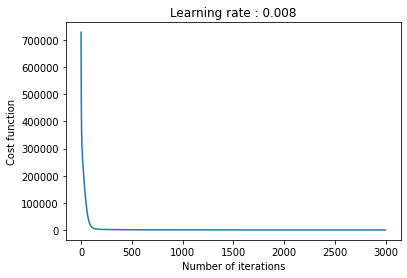

In [26]:
plt.plot(Cost_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Learning rate : 0.008")
plt.show()

In [21]:
X_test = x_transform(x_test , degrees = [2] )
X_test = X_test.T

### Calculating accuracy for test set

In [22]:
def predict(x_test, parameters):
    forward_cache = forward_propagation(x_test, parameters)
    return forward_cache["a2"]
y_pred = predict(X_test, Parameters)


In [23]:
y_pred.shape

(1, 10000)

### R 2 score

In [24]:
# r2 score
def r2_score(y, y_hat):
    q = np.sum((np.array(y_hat)-np.array(y))**2)
    e =  np.sum((np.array(y)-np.mean(np.array(y)))**2)          
    return 1-(q/e)
r2_scr = r2_score(y_test.reshape(10000,1), y_pred.T)
print(r2_scr)

0.9999005768863168


### Root mean square error of test set

In [25]:
# root mean square error
targets = y_test
predictions = y_pred
def rmse(predictions, targets):
    return np.sqrt((np.square(predictions - targets)).mean())
rms_error = rmse(predictions, targets)
print(rms_error)

12.02213534766623
